# Variability of visual field maps in human early extrastriate cortex challenges the canonical model of organization of V2 and V3

This interactive notebook shows how to run the main analyses reported in our manuscript. Before doing so, download the data following the steps documented in README.md and activate the *VariabilityEarlyVisualCortex_clustering* conda environment. 

## Individual variability in retinotopy

The script below computes individual variability in visual field maps (in addition to curvature and normalized mean BOLD signal) to quantify how variable these maps are across visual areas (V1, V2, and V3), portions (dorsal and ventral), and hemispheres (left and right) in human early visual cortex. Amongst the outputs are the spreadsheet files with individual variability scores (long format; they be at **./../output/lme/**) and violin plots (**./../figures/figure2/** and **./../figures/other/**). These files are promptly available on OSF (https://osf.io/tdkuj/).

In [7]:
%%bash
cd ./../main/
python run_1_individual_variability.py

Figure(1000x500)
Saved long format data for polarAngle in ./../output/lme/longFormat_polarAngle_MSMall_all.xlsx
Figure(1000x500)
Figure(1000x500)
Saved long format data for eccentricity in ./../output/lme/longFormat_eccentricity_MSMall_all.xlsx
Figure(1000x500)
Figure(1000x500)
Saved long format data for curvature in ./../output/lme/longFormat_curvature_MSMall_all.xlsx
Figure(1000x500)
Figure(1000x500)
Saved long format data for meanbold in ./../output/lme/longFormat_meanbold_MSMall_all.xlsx
Figure(1000x500)


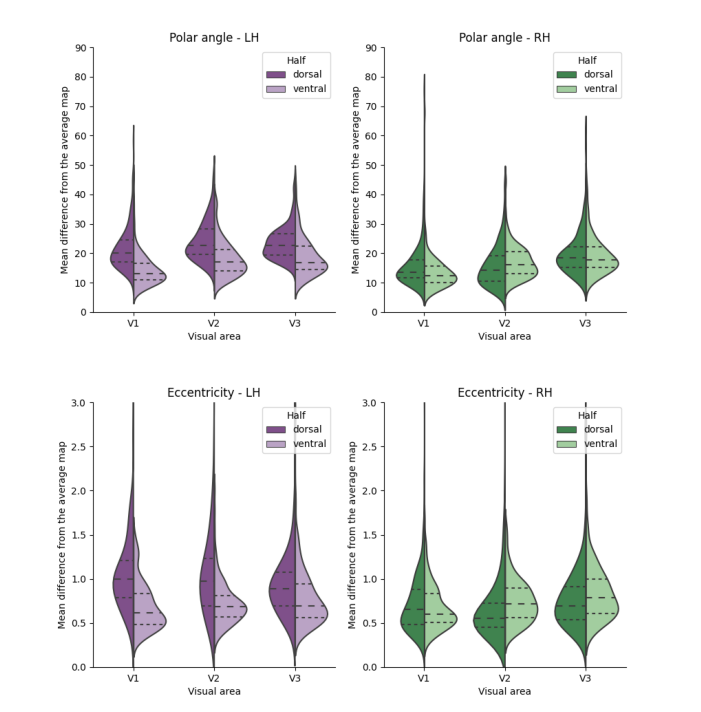

In [1]:
# Figure 2
from pylab import imread
import matplotlib.pyplot as plt

img1= imread('./../figures/figure2/MeanDifFromTheMean_perHemi_polarAngle_181participants.png',format='png')
img2= imread('./../figures/figure2/MeanDifFromTheMean_perHemi_eccentricity_181participants.png',format='png')

fig, axs = plt.subplots(2, 1, figsize=(15, 10))

axs[0].imshow(img1)
axs[0].axis('off')

axs[1].imshow(img2)
axs[1].axis('off')
plt.tight_layout()

*longFormat_polarAngle_MSMall_all.xlsx* and *longFormat_eccentricity_MSMall_all.xlsx* are used for their respective linear mixed effect (LME) models (without covariates). We also made available the .omv files with LME fits using Jamovi on OSF (**OSF Storage/output/lme/**).

In [2]:
import pandas as pd

df = pd.read_csv('./../output/lme/longFormat_polarAngle_MSMall_all.csv')
df.head()

,Unnamed: 0,HCP_ID,Mean difference from the average map,Hemisphere,Hemi visual area,Visual area,Half
0,0,100610,26.034261,LH,V1d,V1,dorsal
1,1,102311,23.973772,LH,V1d,V1,dorsal
2,2,102816,28.411529,LH,V1d,V1,dorsal
3,3,104416,32.224541,LH,V1d,V1,dorsal
4,4,105923,13.202553,LH,V1d,V1,dorsal


## Influence of covariates on individual variability of retinotopic maps

Before using individual variability in curvature and normalized mean BOLD maps as covariates in the LME models, we first determined whether those maps were correlated with retinotopic maps. *run_2_correlation_covariates.py* computes pair-wise correlations among polar angle, eccentricity, curvature, and normalized mean BOLD signal for both V1-3 and each visual area separately. Given a region of interest, each topographic map was vectorized, and data were concatenated across all participants (n=181) for each modality. Polar angle maps were converted such that 0⁰ corresponds to the horizontal meridian and 90⁰ corresponds to the upper and lower vertical meridians. Finally, pair-wise correlations were determined using these concatenated sets of vectorized maps. 

In [ ]:
%%bash
cd ./../main/
python run_2_correlation_covariates.py

LH: Correlation between polarAngle and eccentricity is 0.10010252414822955 and p-value 0.0
LH: Correlation between polarAngle and curvature is 0.14269077494462187 and p-value 0.0
LH: Correlation between polarAngle and meanbold is -0.06286937768915632 and p-value 4.446020055489232e-165
LH: Correlation between eccentricity and polarAngle is 0.10010252414822955 and p-value 0.0
LH: Correlation between eccentricity and curvature is 0.0049498999779571595 and p-value 0.031257426523779865
LH: Correlation between eccentricity and meanbold is 0.018876818431083988 and p-value 2.134325251980419e-16
LH: Correlation between curvature and polarAngle is 0.14269077494462187 and p-value 0.0
LH: Correlation between curvature and eccentricity is 0.0049498999779571595 and p-value 0.031257426523779865
LH: Correlation between curvature and meanbold is -0.17088886594595015 and p-value 0.0
LH: Correlation between meanbold and polarAngle is -0.06286937768915632 and p-value 4.446020055489232e-165
LH: Correlation

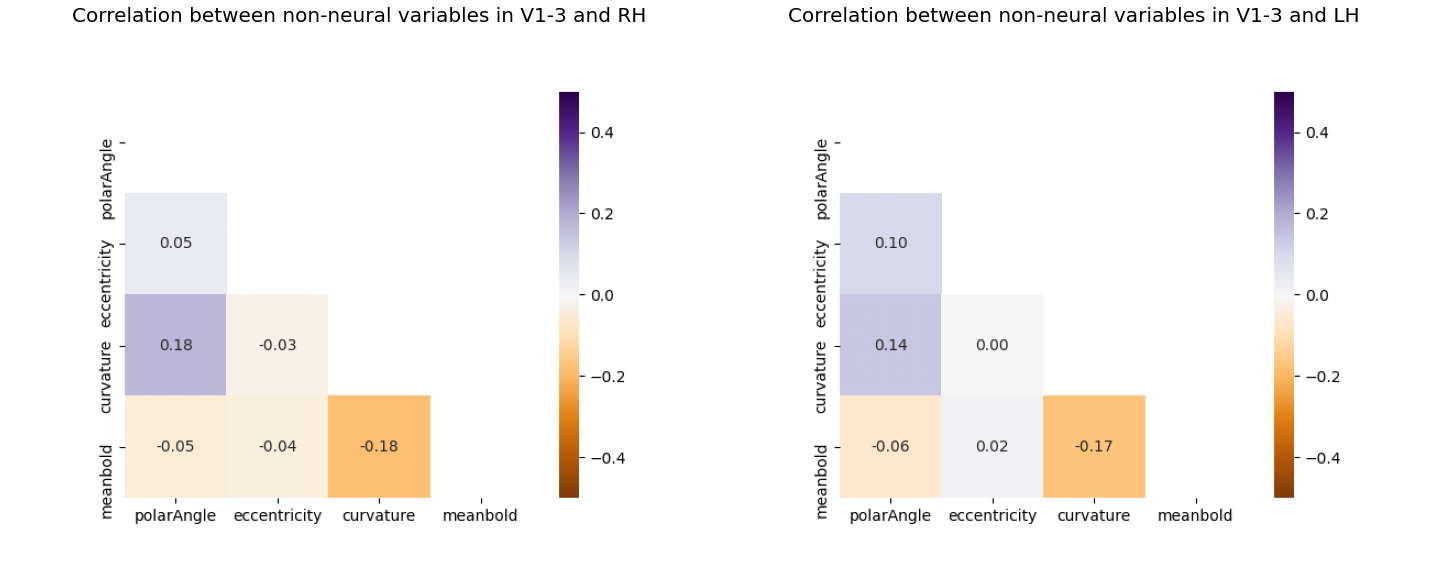

In [3]:
# Figure 3 subplots
visual_area = 'V1-3' # 'V1d, V1v, V2d, V2v, V3d, V3v, V1-3

img1= imread('./../figures/figure3/correlationNonNeuralVariables_RH_'+ visual_area +'_181participants.png',format='png')
img2= imread('./../figures/figure3/correlationNonNeuralVariables_LH_'+ visual_area +'_181participants.png',format='png')

fig, axs = plt.subplots(1, 2, figsize=(20, 15))

axs[0].set_title('Correlation between non-neural variables in ' + visual_area + ' and RH', fontsize=20)
axs[0].imshow(img1)
axs[0].axis('off')

axs[1].set_title('Correlation between non-neural variables in ' + visual_area + ' and LH', fontsize=20)
axs[1].imshow(img2)
axs[1].axis('off')
plt.tight_layout()

Finally, before fitting a new LME with covariates, we considered intra-individual variability in pRF estimates as a covariate. Intra-individual variability was operationalized as the difference in pRF estimates from two pRF model fits of half splits of the retinotopic mapping data.

In [6]:
%%bash
cd ./../main/
python run_3_intraIndividual_variability.py

Figure(1000x500)
Figure(1000x500)
Figure(1000x500)
Figure(1000x500)


In [4]:
df = pd.read_csv('./../output/lme/intraSubj_longFormat_polarAngle_all.csv')
df.head()

,Unnamed: 0,HCP_ID,Mean intra-individual variability in pRF estimates,Hemisphere,Hemi visual area,Visual area,Half
0,0,100610,12.944912,LH,V1d,V1,dorsal
1,1,102311,19.040719,LH,V1d,V1,dorsal
2,2,102816,11.063193,LH,V1d,V1,dorsal
3,3,104416,17.584522,LH,V1d,V1,dorsal
4,4,105923,5.754864,LH,V1d,V1,dorsal


Now, with all these measures, we can fit an LME model taking into consideration these potential cofounds. 

In [3]:
# Preparing data for LME model with covariates (Table 3 and 4)

retinotopic_map = 'eccentricity' # 'polarAngle', 'eccentricity'
df_main = pd.read_csv('./../output/lme/longFormat_' + retinotopic_map + '_MSMall_all.csv')

df_curvature = pd.read_csv('./../output/lme/longFormat_curvature_MSMall_all.csv')
df_curvature.columns = [' Mean difference in curvature' if x=='Mean difference from the average map' else x for x in df_curvature.columns]

df_normMeanBOLD = pd.read_csv('./../output/lme/longFormat_meanbold_MSMall_all.csv')
df_normMeanBOLD.columns = ['Mean difference in normalized mean BOLD' if x=='Mean difference from the average map' else x for x in df_normMeanBOLD.columns]

df_intraSubVariability = pd.read_csv('./../output/lme/intraSubj_longFormat_' + retinotopic_map + '_all.csv')
df_intraSubVariability.columns = ['Mean intra-individual variability' if x=='Mean intra-individual variability in pRF estimates' else x for x in df_intraSubVariability.columns]

new_df = pd.concat([df_main, df_curvature[' Mean difference in curvature'], df_normMeanBOLD['Mean difference in normalized mean BOLD'], df_intraSubVariability['Mean intra-individual variability']], axis=1)
new_df.to_csv('./../output/lme/longFormat_' + retinotopic_map + '_plusCovariates_MSMall_all.csv')
new_df.to_excel('./../output/lme/longFormat_' + retinotopic_map + '_plusCovariates_MSMall_all.xlsx')


The .omv files are on OSF (**OSF Storage/output/lme/**).

## Common modes of variability

Lastly, we performed an exploratory analysis to determine whether polar angle maps differ from the average map in similar ways, particularly in the dorsal portion of early visual cortex of the left hemisphere. The following script outputs the similarity matrix before and after clustering (**./../output/figure4/**) and the distributions of pairwise Jaccard scores (**./../output/figure6/**).

In [46]:
%%bash
cd ./../main/
python run_4_clustering_JaccardSimilarity_PAmaps.py

Figure(640x480)
Figure(640x480)
Figure(1125x1575)


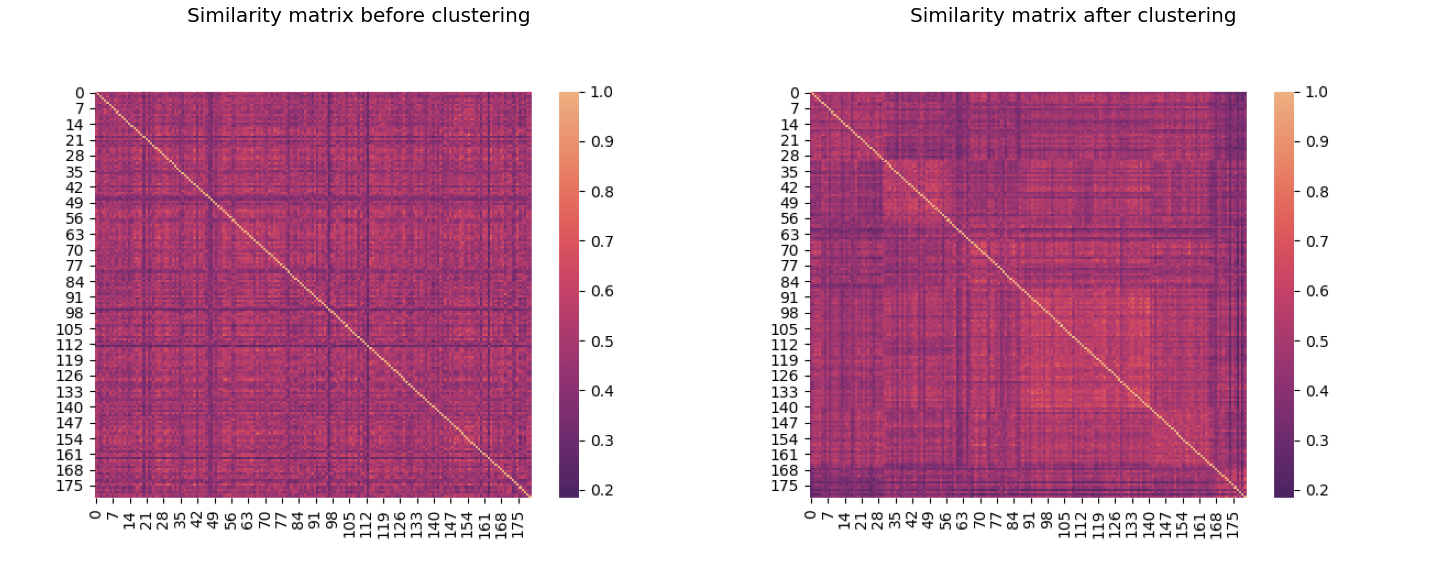

In [5]:
# Figure 4 subplots

img1= imread('./../figures/figure4/jaccardMatrix_PAmaps_beforeClustering.png',format='png')
img2= imread('./../figures/figure4/jaccardMatrix_PAmaps_afterClustering.png',format='png')

fig, axs = plt.subplots(1, 2, figsize=(20, 15))

axs[0].set_title('Similarity matrix before clustering', fontsize=20)
axs[0].imshow(img1)
axs[0].axis('off')

axs[1].set_title('Similarity matrix after clustering', fontsize=20)
axs[1].imshow(img2)
axs[1].axis('off')
plt.tight_layout()

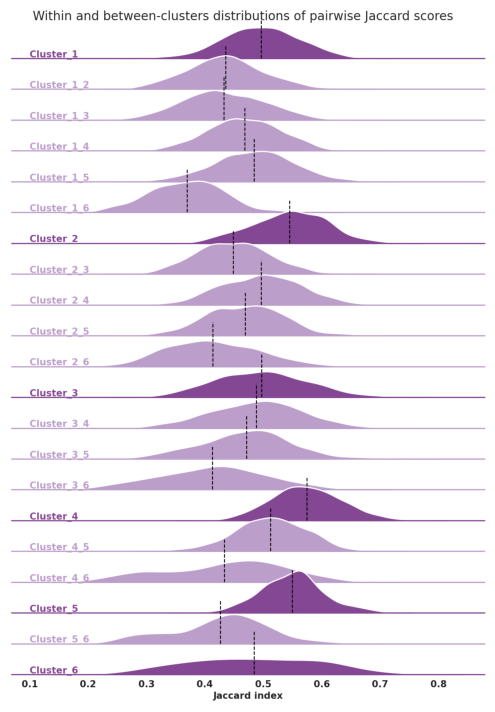

In [6]:
# Figure 6
img= imread('./../figures/figure6/figure6.png',format='png')

fig, ax = plt.subplots(figsize=(15, 10))

ax.imshow(img)
ax.axis('off')
plt.tight_layout()

The remaining polar angle, eccentricity, and visual field sign maps were generated using plotting functions available on **./../figures/**, which were also used for interactive visualization in our *maps-visualization.ipynb* Jupyter notebook. Note that generating those figures requires the *VariabilityEarlyVisualCortex* conda environment.